In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
import duckdb

Cyclic Lipopeptides (CLPs) contain a fatty acid tail attached to a cyclic peptide skeleton. These peptides possess broad-spectrum antifungal and antibiotic properties. They mostly act through membrane integration and formation of pores, thereby causing the leakage of the intracellular components and causing eventual cell death (https://www.frontiersin.org/articles/10.3389/fchem.2021.691532/full)

In [2]:
with duckdb.connect("../soil_plasmid.db") as con:
    ptu_df = con.sql("SELECT * FROM ptu_derep").df()
    df_env = con.sql("SELECT * FROM taxon_metadata").df().set_index("taxon_oid")
    df_host = con.sql("SELECT * FROM host").df()

ptu_df.set_index("PTU", inplace=True)
ptu_df.head()

,Representative,Members,Length,oids,Ecosystem Subtype Custom,Ecosystem Subtype,WWF_MHTNAM,Origin,Full_origin
PTU,,,,,,,,,
PTU-00000,3300056587|Ga0562382_00532,"3300056587|Ga0562382_00532,3300041809|Ga045567...",187,"3300056587,3300041809,3300056587,3300055278,33...",Peat;Grasslands;Peat;Temperate forest;Peat;Pea...,Peat;Grasslands;Peat;Temperate forest;Peat;Pea...,Tundra;Temperate Conifer Forests;Tundra;Temper...,Meta,Meta;Meta;Meta;Meta;Meta;Meta;Meta;Meta;Meta;M...
PTU-00001,3300056791|Ga0562384_00281,"3300056791|Ga0562384_00281,3300054973|Ga049542...",158,"3300056791,3300054973,3300047661,3300051166,33...",Peat;Peat;Peat;Peat;Peat;Peat;Peat;Peat;Peat;P...,Peat;Peat;Peat;Peat;Peat;Peat;Peat;Peat;Peat;P...,Tundra;Tundra;Tundra;Tundra;Tundra;Tundra;Tund...,Meta,Meta;Meta;Meta;Meta;Meta;Meta;Meta;Meta;Meta;M...
PTU-00002,3300046709|Ga0495471_0000157,"3300046709|Ga0495471_0000157,3300046788|Ga0495...",105,"3300046709,3300046788,3300046461,3300046811,33...",Agricultural land;Agricultural land;Rhizospher...,Agricultural land;Agricultural land;Rhizospher...,Temperate Conifer Forests;Temperate Conifer Fo...,Meta,Meta;Meta;Meta;Meta;Meta;Meta;Meta;Meta;Meta;M...
PTU-00003,3300046559|Ga0495667_0000358,"3300046559|Ga0495667_0000358,3300036401|Ga0373...",98,"3300046559,3300036401,3300046543,3300046724,33...",Rhizosphere;Rhizosphere;Rhizosphere;Agricultur...,Rhizosphere;Rhizosphere;Rhizosphere;Agricultur...,Temperate Conifer Forests;Temperate Conifer Fo...,Meta,Meta;Meta;Meta;Meta;Meta;Meta;Meta;Meta;Meta;M...
PTU-00004,3300056834|Ga0562381_00901,"3300056834|Ga0562381_00901,3300056587|Ga056238...",85,"3300056834,3300056587,3300048796,3300048785,33...",Peat;Peat;Peat;Peat;Peat;Temperate forest;Gras...,Peat;Peat;Peat;Peat;Peat;Temperate forest;Gras...,Tundra;Tundra;Tundra;Tundra;Tundra;Temperate C...,Meta,Meta;Meta;Meta;Meta;Meta;Meta;Meta;Meta;Meta;M...


In [3]:
df_host

,Plasmid,host,method
0,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast
1,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast
2,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast
3,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast
4,2088090015|GPICI_8721071,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,iphop-blast
...,...,...,...
398900,Refsoil_NZ_HG916853.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate
398901,Refsoil_NZ_HG916854.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate
398902,Refsoil_NZ_HG916855.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate
398903,Refsoil_NZ_HG938354.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate


In [4]:
ptu_mapping = {}

for ptu in ptu_df.index:
    for member in ptu_df.loc[ptu, "Members"].split(","):
        ptu_mapping[member] = ptu

# ptu_mapping

In [5]:
df = pd.read_csv("../amp/amp_macrel.tsv", sep="\t")
df["Plasmid"] = df["Access"].apply(
    lambda x: "_".join(x.split("_")[0:-1] if "IMGPR" not in x else x.split("|")[0])
)

df["taxon_oid"] = df["Plasmid"].apply(
    lambda x: (x.split("|")[0] if "IMGPR" not in x else x.split("_")[2])
)
df["amp_length"] = df["Sequence"].apply(len)
df["ptu"] = df["Plasmid"].apply(lambda x: ptu_mapping.get(x))
df = df[~df["ptu"].isnull()]


df.head()

,Access,Sequence,AMP_family,AMP_probability,Hemolytic,Hemolytic_probability,Plasmid,taxon_oid,amp_length,ptu
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639
1,3300000364|INPhiseqgaiiFebDRAFT_100802549_11,VGVKGRLPTDWADMTRVYAQRKGQFLVVSRAFLFRGGADS,CLP,0.614,Hemo,0.525,3300000364|INPhiseqgaiiFebDRAFT_100802549,3300000364,40,PTU-24995
2,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,LIREGVPRKVIARVLLQKGPHRLKRE,CLP,0.624,Hemo,0.644,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,3300000519,26,PTU-10024
3,3300001915|JGI24741J21665_1000312_2,DTNGKKAPQPRWDAGFCMMLDWMTYWTFQSTMFSMGATRFISGK,CDP,0.584,NonHemo,0.119,3300001915|JGI24741J21665_1000312,3300001915,44,PTU-10424
4,3300001989|JGI24739J22299_10001785_10,IGVGRTKLYELIAAGEIETVKLGKATRITTASLHDLVRQQRGA,CLP,0.515,NonHemo,0.396,3300001989|JGI24739J22299_10001785,3300001989,43,PTU-00569


In [6]:
from collections import defaultdict


df_amp_blast = pd.read_csv("../amp/amp_blast_filtered.tsv", sep="\t")

hits = defaultdict(set)

for index, row in df_amp_blast.iterrows():
    hits[row[0]].add(row[1])
df["ref_hits"] = df["Access"].map(hits)
df["num_ref_hits"] = df["ref_hits"].apply(len)

/tmp/ipykernel_257239/3398531988.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hits[row[0]].add(row[1])


In [7]:
df = df.join(df_env, on="taxon_oid").join(
    df_host.drop("method", axis=1).set_index("Plasmid"), on="Plasmid"
)
df.head()

,Access,Sequence,AMP_family,AMP_probability,Hemolytic,Hemolytic_probability,Plasmid,taxon_oid,amp_length,ptu,...,soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM,host
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,991.0,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,991.0,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,991.0,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,991.0,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,991.0,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...


In [8]:
df_amp_g = pd.read_csv("../amp/macrel_cluster.tsv.fixed", sep="\t")
df_amp_g["cluster_members"] = df_amp_g["cluster_members"].apply(lambda x: x.split(","))
df_amp_g = df_amp_g.explode("cluster_members").set_index("cluster_id")

df_amp_g_mapping = {}
for index, row in df_amp_g.iterrows():
    df_amp_g_mapping[row["cluster_members"]] = index
df["cluster_id"] = df["Access"].apply(lambda x: df_amp_g_mapping.get(x))
df.head()

,Access,Sequence,AMP_family,AMP_probability,Hemolytic,Hemolytic_probability,Plasmid,taxon_oid,amp_length,ptu,...,geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM,host,cluster_id
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,AMPG-0598
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,AMPG-0598
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,AMPG-0598
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,AMPG-0598
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,AMPG-0598


In [9]:
df.columns

Index(['Access', 'Sequence', 'AMP_family', 'AMP_probability', 'Hemolytic',
       'Hemolytic_probability', 'Plasmid', 'taxon_oid', 'amp_length', 'ptu',
       'ref_hits', 'num_ref_hits', 'Ecosystem Subtype', 'Latitude',
       'Longitude', 'Origin', 'Isolation Country', 'Ecosystem Subtype Custom',
       'Plasmid Count', 'soil_class', 'bdod (cg/cm³)', 'cec (mmol(c)/kg)',
       'cfvo (cm³/dm³)', 'clay (g/kg)', 'nitrogen (cg/kg)', 'ocd (dg/dm³)',
       'phh2o (pH*10)', 'sand (g/kg)', 'silt (g/kg)', 'soc (dg/kg)',
       'geometry', 'index_right', 'ECO_NAME', 'WWF_REALM', 'RealmMHT',
       'WWF_REALM2', 'WWF_MHTNUM', 'WWF_MHTNAM', 'host', 'cluster_id'],
      dtype='object')

In [10]:
df[(df["num_ref_hits"] > 0)][
    [
        "Access",
        "Ecosystem Subtype Custom",
        "Plasmid",
        "ptu",
        "ref_hits",
        "num_ref_hits",
        "cluster_id",
    ]
]

,Access,Ecosystem Subtype Custom,Plasmid,ptu,ref_hits,num_ref_hits,cluster_id
3,3300001915|JGI24741J21665_1000312_2,Rhizosphere,3300001915|JGI24741J21665_1000312,PTU-10424,{AMP10.182_788},1,AMPG-0031
4,3300001989|JGI24739J22299_10001785_10,Rhizosphere,3300001989|JGI24739J22299_10001785,PTU-00569,"{AMP10.253_228, AMP10.797_107}",2,AMPG-0005
4,3300001989|JGI24739J22299_10001785_10,Rhizosphere,3300001989|JGI24739J22299_10001785,PTU-00569,"{AMP10.253_228, AMP10.797_107}",2,AMPG-0005
4,3300001989|JGI24739J22299_10001785_10,Rhizosphere,3300001989|JGI24739J22299_10001785,PTU-00569,"{AMP10.253_228, AMP10.797_107}",2,AMPG-0005
4,3300001989|JGI24739J22299_10001785_10,Rhizosphere,3300001989|JGI24739J22299_10001785,PTU-00569,"{AMP10.253_228, AMP10.797_107}",2,AMPG-0005
...,...,...,...,...,...,...,...
1744,Refsoil_NZ_CP007616.1_249,Unclassified,Refsoil_NZ_CP007616.1,PTU-00664,{AMP10.008_605},1,AMPG-0004
1745,Refsoil_NZ_CP007664.1_61,Unclassified,Refsoil_NZ_CP007664.1,PTU-00197,{AMP10.007_248},1,AMPG-0002
1746,Refsoil_NZ_CP007665.1_20,Unclassified,Refsoil_NZ_CP007665.1,PTU-00140,{AMP10.609_583},1,AMPG-0003
1747,Refsoil_NZ_CP007702.1_12,Unclassified,Refsoil_NZ_CP007702.1,PTU-00197,{AMP10.007_248},1,AMPG-0002


In [11]:
test = df[(df["num_ref_hits"] == 0)][
    [
        "Access",
        "AMP_family",
        "Ecosystem Subtype Custom",
        "Plasmid",
        "ptu",
        "cluster_id",
        "Sequence",
    ]
]
test["length"] = test["Sequence"].apply(len)
test = test.join(df_host.set_index("Plasmid")["host"], on="Plasmid").drop_duplicates()
test.to_csv("../amp/new_plasmid_amps.tsv", sep="\t", index=False)

In [12]:
print(
    f'Number of AMPs with hits to reference dbs {df[(df["num_ref_hits"] > 0)].drop_duplicates(subset=["Access"]).shape[0]}'
)
print(
    f'Number of AMP groups with hits to reference dbs {df[(df["num_ref_hits"] > 0)].drop_duplicates(subset=["cluster_id"]).shape[0]}'
)

print(
    f'Number of hemo AMPs {df[(df["Hemolytic"] == "Hemo")].drop_duplicates(subset=["Access"]).shape[0]}'
)

print(
    f'Number of hemo AMP groups {df[(df["Hemolytic"] == "Hemo")].drop_duplicates(subset=["cluster_id"]).shape[0]}'
)

Number of AMPs with hits to reference dbs 358
Number of AMP groups with hits to reference dbs 179
Number of hemo AMPs 842
Number of hemo AMP groups 628


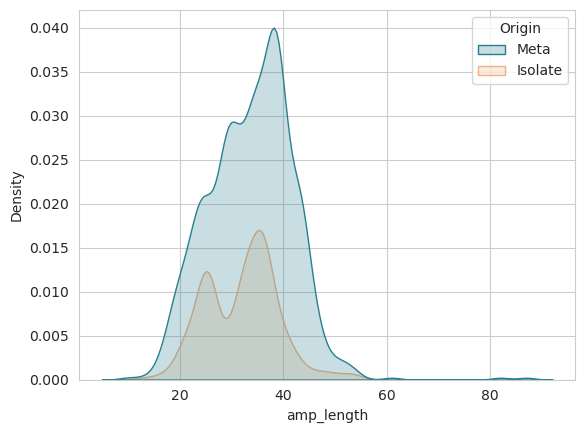

In [13]:
sns.kdeplot(
    data=df.drop_duplicates("Access"),
    x="amp_length",
    hue="Origin",
    fill=True,
    bw_adjust=0.8,
    palette=["#277F8E", "#EEB182"],
)
plt.savefig("../figures/amp_length_origin.pdf", bbox_inches="tight")

In [14]:
ref_hits = (
    df[(df["num_ref_hits"] > 0)]
    .drop_duplicates(subset=["Access"])
    .explode("ref_hits")["ref_hits"]
    .unique()
)

[i for i in ref_hits if "AMP" not in i]

['APD_01190', 'DBAASPR_11332', 'APD_01191']

In [15]:
# with open('amp_ref_hits.txt', 'w') as f:
#     for i in set(ref_hits):
#         f.write(f'{i}\n')

In [16]:
import polars as pl

gmsc_df = pl.read_csv("../amp/GMSCMetadata.tsv", separator="\t")
gmsc_df.head()

accession,gene_sequence,AMP,sample,specI,is_metagenomic,geographic_location,latitude,longitude,general_envo_name,environment_material,microbial_source_d,microbial_source_p,microbial_source_c,microbial_source_o,microbial_source_f,microbial_source_g,microbial_source_s
str,str,str,str,str,bool,str,str,str,str,str,str,str,str,str,str,str,str
"""GMSC10.SMORF.0…","""ATGAAACTGCGCAA…","""AMP10.000_004""","""344610.PRJNA15…","""specI_v3_Clust…",false,null,null,null,"""Progenomes""",null,"""Bacteria""","""Proteobacteria…","""Gammaproteobac…","""Enterobacteral…","""Enterobacteria…","""Escherichia""","""Escherichia fl…"
"""GMSC10.SMORF.0…","""TTATTGTAAGGGTT…","""AMP10.000_126""","""439842.PRJNA19…","""specI_v3_Clust…",false,null,null,null,"""Progenomes""",null,"""Bacteria""","""Proteobacteria…","""Gammaproteobac…","""Enterobacteral…","""Enterobacteria…","""Salmonella""","""Salmonella ent…"
"""GMSC10.SMORF.0…","""ATGTGCTTCACCTC…","""AMP10.000_136""","""465517.PRJNA20…","""specI_v3_Clust…",false,null,null,null,"""Progenomes""",null,"""Bacteria""","""Proteobacteria…","""Gammaproteobac…","""Enterobacteral…","""Enterobacteria…","""Salmonella""","""Salmonella ent…"
"""GMSC10.SMORF.0…","""TTACCCGACAAGGA…","""AMP10.001_286""","""1055526.PRJNA6…","""specI_v3_Clust…",false,null,null,null,"""Progenomes""",null,"""Bacteria""","""Proteobacteria…","""Gammaproteobac…","""Burkholderiale…","""Burkholderiace…","""Caballeronia""","""Caballeronia s…"
"""GMSC10.SMORF.0…","""ATGATAAAAATCAA…","""AMP10.068_417""","""1027397.PRJNA6…","""specI_v3_Clust…",false,null,null,null,"""Progenomes""",null,"""Bacteria""","""Proteobacteria…","""Gammaproteobac…","""Enterobacteral…","""Enterobacteria…","""Erwinia""","""Erwinia amylov…"


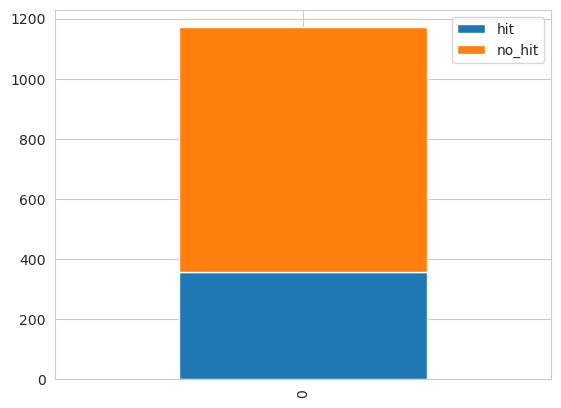

In [17]:
hits_dict = {}
hits_dict["hit"] = (
    df[(df["num_ref_hits"] > 0)].drop_duplicates(subset=["Access"]).shape[0]
)
hits_dict["no_hit"] = (
    df[(df["num_ref_hits"] == 0)].drop_duplicates(subset=["Access"]).shape[0]
)

pd.DataFrame(hits_dict, index=[0]).plot(kind="bar", stacked=True)
# sns.barplot(x=list(hits_dict.keys()), y=list(hits_dict.values()), hue=list(hits_dict.keys()))
plt.savefig("../figures/amp_ref_hits.pdf", bbox_inches="tight")

In [18]:
hits_dict

{'hit': 358, 'no_hit': 813}

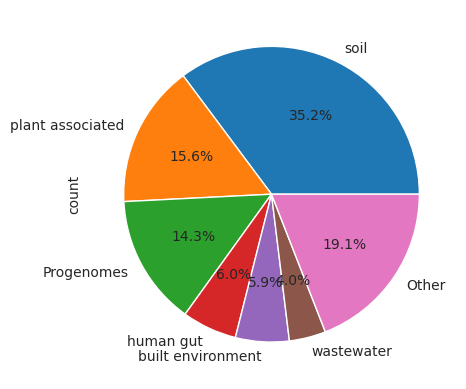

In [21]:
gmsc_hits_counts = (
    gmsc_df.filter(pl.col("AMP").is_in(list(ref_hits)))
    .unique(subset=["AMP", "general_envo_name"])["general_envo_name"]
    .value_counts()
    .sort("count", descending=True)
    .to_pandas()
    .set_index("general_envo_name")
)
gmsc_hits_counts
gmsc_hits_counts.loc["Other", "count"] = gmsc_hits_counts[
    gmsc_hits_counts["count"] < 30
].sum()["count"]
gmsc_hits_counts[gmsc_hits_counts["count"] > 29].plot(
    kind="pie", y="count", legend=False, autopct="%1.1f%%"
)
plt.savefig("../figures/amp_ref_hits_envo.pdf", bbox_inches="tight")

In [22]:
gmsc_hits_counts[gmsc_hits_counts["count"] < 29]

,count
general_envo_name,
marine,16.0
river associated,12.0
activated sludge,10.0
chicken gut,9.0
human skin,8.0
lake associated,6.0
pig gut,6.0
mouse gut,4.0
crustacean associated,4.0


<Axes: ylabel='Ecosystem Subtype Custom'>

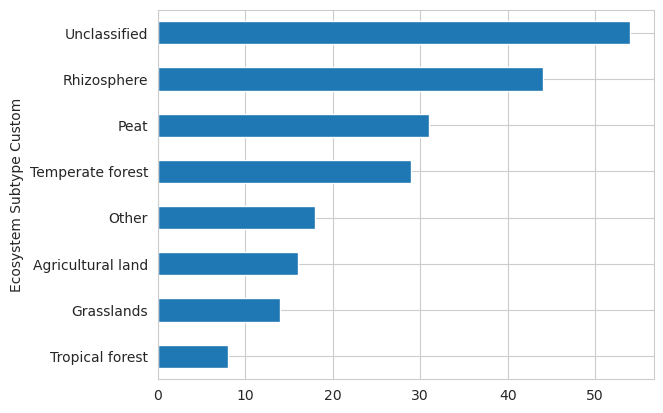

In [23]:
df[(df["num_ref_hits"] > 0)].groupby("Ecosystem Subtype Custom")[
    "ptu"
].nunique().sort_values(ascending=True).plot(kind="barh")

In [24]:
df["host_o"] = df["host"].apply(
    lambda x: x.split(";")[3] if isinstance(x, str) and "o__" in x else np.nan
)

df.head()

,Access,Sequence,AMP_family,AMP_probability,Hemolytic,Hemolytic_probability,Plasmid,taxon_oid,amp_length,ptu,...,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM,host,cluster_id,host_o
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,AMPG-0598,o__Xanthomonadales
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,AMPG-0598,o__Xanthomonadales
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,AMPG-0598,o__Xanthomonadales
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,AMPG-0598,o__Xanthomonadales
0,2162886015|FOassembled-_contig00007_22,RKNFRNAVPDQRPIRKVVRRLRVWKQAEKVGNSLAPL,CLP,0.545,Hemo,0.693,2162886015|FOassembled-_contig00007,2162886015,37,PTU-06639,...,547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,AMPG-0598,o__Xanthomonadales


In [25]:
vals = (
    df.drop_duplicates(subset=["cluster_id", "ptu", "host_o"])
    .groupby("host_o")["cluster_id"]
    .nunique()
    .sort_values(ascending=False)
)

df["new_o__"] = df["host_o"].apply(
    lambda x: ("Other" if pd.isna(x) else x if vals[x] > 28 else "Other")
)

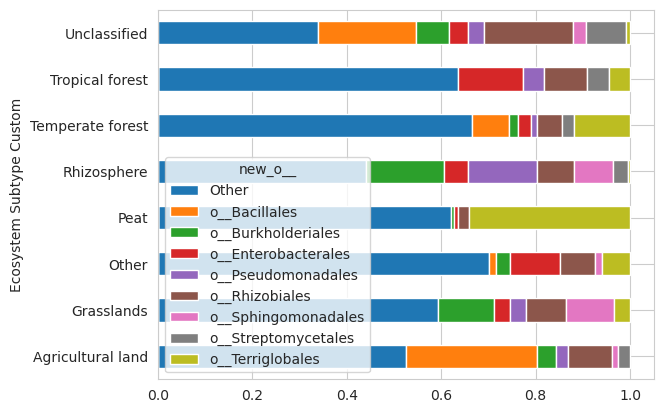

In [26]:
a = (
    df.drop_duplicates(subset=["cluster_id", "ptu", "new_o__"])
    .groupby("Ecosystem Subtype Custom")["new_o__"]
    .value_counts()
    .sort_values(ascending=False)
    .unstack()
    .fillna(0)
)
a["Total"] = a.sum(axis=1)

a.apply(lambda x: x / x["Total"], axis=1).drop("Total", axis=1).plot(
    kind="barh", stacked=True
)
plt.savefig("../figures/amp_host.pdf", bbox_inches="tight")

In [27]:
df.groupby("Ecosystem Subtype Custom")["cluster_id"].nunique().sort_values(
    ascending=False
)

Ecosystem Subtype Custom
Unclassified         245
Rhizosphere          198
Temperate forest     143
Peat                 120
Agricultural land     74
Other                 68
Grasslands            60
Tropical forest       23
Name: cluster_id, dtype: int64

In [28]:
da = (
    df.groupby("cluster_id")["Ecosystem Subtype Custom"]
    .nunique()
    .sort_values(ascending=False)
)

In [29]:
da

cluster_id
AMPG-0000    6
AMPG-0003    3
AMPG-0010    3
AMPG-0011    3
AMPG-0012    3
            ..
AMPG-0414    1
AMPG-0415    1
AMPG-0416    1
AMPG-0419    1
AMPG-1227    1
Name: Ecosystem Subtype Custom, Length: 892, dtype: int64

In [30]:
df[df["cluster_id"] == "AMPG-0012"]["Ecosystem Subtype Custom"].unique()

array(['Agricultural land', 'Temperate forest', 'Unclassified'],
      dtype=object)

In [31]:
df.groupby("cluster_id")["ptu"].nunique().sort_values(ascending=False)

cluster_id
AMPG-0000    6
AMPG-0004    5
AMPG-0012    4
AMPG-0010    4
AMPG-0011    4
            ..
AMPG-0422    1
AMPG-0423    1
AMPG-0424    1
AMPG-0426    1
AMPG-1227    1
Name: ptu, Length: 892, dtype: int64

## AMP density

In [32]:
df_amp_density = pd.read_csv(
    "../amp/macrel_out_contigs/macrel.out.percontigs.gz", comment="#", sep="\t"
)
df_amp_density["PTU"] = df_amp_density["contig"].apply(lambda x: ptu_mapping.get(x))
df_amp_density["taxon_oid"] = df_amp_density["contig"].apply(
    lambda x: x.split("|")[0] if "IMGPR" not in x else x.split("_")[2]
)
# df_amp_density = df_amp_density.join(df_host.set_index("Plasmid")["host"], on="contig")

df_amp_density = df_amp_density.join(
    df_env[["Ecosystem Subtype", "Ecosystem Subtype Custom"]], on="taxon_oid"
)
df_amp_density["Origin"] = df_amp_density["contig"].apply(
    lambda x: "Isolate"
    if any(i for i in ["IMGPR", "PLSDB", "Refsoil"] if i in x)
    else "Meta"
)
df_amp_density.dropna(subset=["PTU"], inplace=True)
df_amp_density.head()

,contig,length,ORFs,smORFs,AMPs,PTU,taxon_oid,Ecosystem Subtype,Ecosystem Subtype Custom,Origin
0,2088090014|GPIPI_16944593,5584,6,3,0,PTU-57264,2088090014,Grasslands,Grasslands,Meta
1,2088090014|GPIPI_16884012,8233,12,7,0,PTU-24923,2088090014,Grasslands,Grasslands,Meta
2,2088090014|GPIPI_17035422,5654,6,2,0,PTU-24922,2088090014,Grasslands,Grasslands,Meta
3,2088090014|GPIPI_17320127,5097,6,1,0,PTU-10110,2088090014,Grasslands,Grasslands,Meta
4,2088090014|GPIPI_16557027,6619,8,2,0,PTU-04071,2088090014,Grasslands,Grasslands,Meta


In [33]:
df_amp_density[df_amp_density["Origin"] == "Isolate"]

,contig,length,ORFs,smORFs,AMPs,PTU,taxon_oid,Ecosystem Subtype,Ecosystem Subtype Custom,Origin
100186,IMGPR_plasmid_2860691947_000001|2860691947|286...,110701,125,30,1,PTU-43249,2860691947,Unclassified,Unclassified,Isolate
100187,IMGPR_plasmid_2860691947_000002|2860691947|286...,561689,412,52,1,PTU-43248,2860691947,Unclassified,Unclassified,Isolate
100190,IMGPR_plasmid_2754412351_000005|2754412351|275...,267249,224,25,0,PTU-14208,2754412351,Unclassified,Unclassified,Isolate
100191,IMGPR_plasmid_2537562007_000009|2537562007|253...,274779,272,28,0,PTU-14206,2537562007,Unclassified,Unclassified,Isolate
100192,IMGPR_plasmid_2537562007_000001|2537562007|253...,26115,24,7,0,PTU-02735,2537562007,Unclassified,Unclassified,Isolate
...,...,...,...,...,...,...,...,...,...,...
143688,Refsoil_NZ_HG916855.1,1932030,1879,292,0,PTU-14278,Refsoil_NZ_HG916855.1,Unclassified,Unclassified,Isolate
143689,Refsoil_NZ_HG938354.1,1807065,1679,173,1,PTU-03535,Refsoil_NZ_HG938354.1,Unclassified,Unclassified,Isolate
143691,Refsoil_NZ_HG938357.1,175279,179,39,0,PTU-01124,Refsoil_NZ_HG938357.1,Unclassified,Unclassified,Isolate
143692,Refsoil_NC_010181.1,75107,79,26,0,PTU-00777,Refsoil_NC_010181.1,Unclassified,Unclassified,Isolate


Calcular 

In [34]:
df_amp_density["AMP_density"] = df_amp_density["AMPs"] * 1e6 / df_amp_density["length"]

In [35]:
df_amp_density.head()

,contig,length,ORFs,smORFs,AMPs,PTU,taxon_oid,Ecosystem Subtype,Ecosystem Subtype Custom,Origin,AMP_density
0,2088090014|GPIPI_16944593,5584,6,3,0,PTU-57264,2088090014,Grasslands,Grasslands,Meta,0.0
1,2088090014|GPIPI_16884012,8233,12,7,0,PTU-24923,2088090014,Grasslands,Grasslands,Meta,0.0
2,2088090014|GPIPI_17035422,5654,6,2,0,PTU-24922,2088090014,Grasslands,Grasslands,Meta,0.0
3,2088090014|GPIPI_17320127,5097,6,1,0,PTU-10110,2088090014,Grasslands,Grasslands,Meta,0.0
4,2088090014|GPIPI_16557027,6619,8,2,0,PTU-04071,2088090014,Grasslands,Grasslands,Meta,0.0


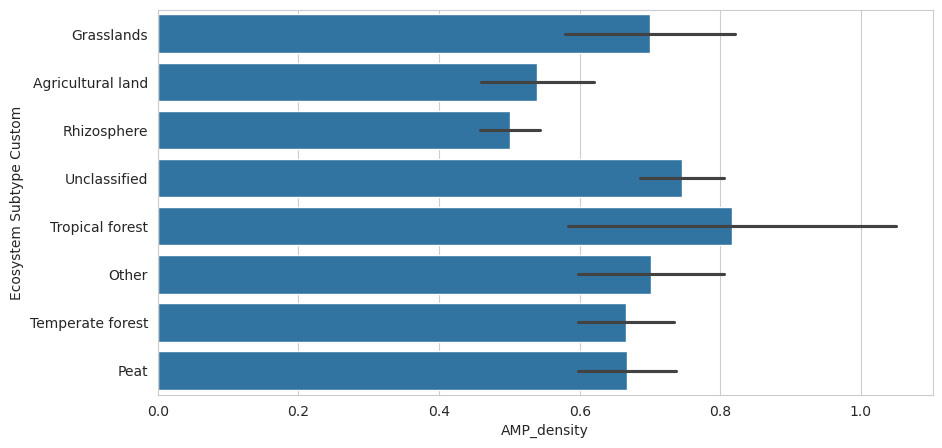

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    df_amp_density, x="AMP_density", y="Ecosystem Subtype Custom", errorbar="se", ax=ax
)
# ax.axvline(per_env["AMP density (AMPs per Mbp)"].mean(), color="red", linestyle="--")
plt.savefig("../figures/amp_density.pdf", bbox_inches="tight")